In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:/Users/djroc/Dropbox/My PC (LAPTOP-8JC4NERN)/Downloads/bank_transactions.csv")

In [3]:
df.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.shape

(1048567, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [7]:
df.drop('TransactionID',inplace=True,axis=1)

In [8]:
df.isnull().sum()/df.shape[0]*100

CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [9]:
df['CustGender'].mode(),df['CustLocation'].mode()

(0    M
 dtype: object,
 0    MUMBAI
 dtype: object)

In [10]:
df['CustGender'].fillna(value='M',inplace=True)
df['CustLocation'].fillna(value='MUMBAI',inplace=True)

In [11]:
df.dropna(subset=['CustomerDOB'],inplace=True)

In [476]:
#df = df.loc[~(df['CustomerDOB']=='1/1/1800')]

In [465]:
df.loc[df['CustomerDOB']=='1/1/1800'].shape[0]/df.shape[0]*100

5.486093171445793

In [12]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'],format="%d/%m/%y")
df['trans_year']=df['TransactionDate'].dt.year
df['trans_mnt']=df['TransactionDate'].dt.month

In [13]:
def dob_yr(x):
    if(x=='1/1/1800'):
        return np.nan
    else:
        yr=x.split('/')[2]
        yr=int(yr)
        if (yr>=0 and yr<=15):
            return 2000+yr
        else:
            return 1900+yr

In [14]:
df['DOB_YR']=df['CustomerDOB'].apply(lambda x:dob_yr(x))
#df.drop('CustomerDOB',inplace=True,axis=1)

In [485]:
df['DOB_YR'].unique()

array([1994., 1957., 1996., 1973., 1988., 1972., 1992., 1982., 1984.,
       1978., 1968.,   nan, 1989., 1991., 1985., 1993., 1986., 1967.,
       1979., 1977., 1997., 1983., 1990., 1980., 1981., 1966., 1987.,
       1975., 1995., 1974., 1971., 1932., 1959., 1999., 1965., 1941.,
       1954., 1970., 1976., 1921., 1969., 2004., 1943., 1998., 1951.,
       1960., 1956., 1953., 1947., 2000., 1964., 1948., 1962., 1952.,
       1955., 1961., 1936., 1963., 1942., 1944., 1938., 2002., 1949.,
       1958., 1950., 1946., 1945., 1937., 2007., 2001., 1939., 1940.,
       2013., 2003., 2005., 2010., 2011., 1933., 1934., 1927., 1919.,
       1928., 1930., 2009., 1931., 1929., 1935., 2015., 1916., 2006.,
       2008., 2012., 1923., 1926., 1924., 1922., 2014., 1920., 1925.,
       1918.])

In [15]:
#Grouping on customer on their id's and taking their mean balance and fill na values of balance with the mean
import math
x=df.groupby('CustomerID')['CustAccountBalance'].mean()
for Id,bal in zip(df['CustomerID'],df['CustAccountBalance']):
    if math.isnan(bal):
        df.loc[df['CustomerID']==Id,'CustAccountBalance']=x[Id]

In [16]:
df['CustAccountBalance'].fillna(value=df['CustAccountBalance'].mean(),inplace=True)

In [17]:
df.isnull().sum()/df.shape[0]*100

CustomerID                 0.000000
CustomerDOB                0.000000
CustGender                 0.000000
CustLocation               0.000000
CustAccountBalance         0.000000
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
trans_year                 0.000000
trans_mnt                  0.000000
DOB_YR                     5.486093
dtype: float64

In [18]:
def loc(x):
    if x=='NAVI MUMBAI':
        return 'MUMBAI'
    elif x=='NEW DELHI':
        return 'DELHI'
    return x

In [19]:
df['CustLocation'] = df['CustLocation'].apply(lambda x:loc(x))

In [20]:
def trans_hr(x):
    return int(x/10000)
def trans_min(x):
    return int((x%10000)/100)

In [21]:
df['TransactionTime(hr)'] = df['TransactionTime'].apply(lambda x:trans_hr(x))
df['TransactionTime(min)'] = df['TransactionTime'].apply(lambda x:trans_min(x))
df.drop('TransactionTime',inplace=True,axis=1)

In [22]:
df.head(5)

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),trans_year,trans_mnt,DOB_YR,TransactionTime(hr),TransactionTime(min)
0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,2016,8,1994.0,14,32
1,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-08-02,27999.0,2016,8,1957.0,14,18
2,C4417068,26/11/96,F,MUMBAI,17874.44,2016-08-02,459.0,2016,8,1996.0,14,27
3,C5342380,14/9/73,F,MUMBAI,866503.21,2016-08-02,2060.0,2016,8,1973.0,14,27
4,C9031234,24/3/88,F,MUMBAI,6714.43,2016-08-02,1762.5,2016,8,1988.0,18,11


In [23]:
def am(x):
    if x<12:
        return 1
    return 0
df['AM'] = df['TransactionTime(hr)'].apply(lambda x:am(x))

In [24]:
df['TransactionAmount (INR)'].describe()

count    1.045170e+06
mean     1.567377e+03
std      6.564780e+03
min      0.000000e+00
25%      1.600000e+02
50%      4.570000e+02
75%      1.200000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64

In [25]:
def cal_age(x):
    if math.isnan(x):
        return np.nan
    else:
        return 2016-x

In [26]:
df['age']=df['DOB_YR'].apply(lambda x:cal_age(x))

In [27]:
df=df.loc[~(df['age']<18)]

In [28]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['age']=df['age'].astype('int')

In [58]:
def ageRange(x):
    y = int(x/10)
    if y==2:
        return '20-29'
    elif y==3:
        return '30-39'
    elif y==4:
        return '40-49'
    elif y==5:
        return '50-59'
    elif y==6:
        return '60-69'
    elif y==7:
        return '70-79'
    elif y==8:
        return '80-89'
    elif y==9:
        return '90-99'
    elif y==10:
        return '100-109'
    else:
        return '18-19'

In [59]:
df['AgeRange'] = df['age'].apply(lambda x:ageRange(x))

In [29]:
df.drop(['DOB_YR','trans_year'],inplace=True,axis=1)

In [30]:

frequency=df['CustomerID'].value_counts()
def freq(x):
    return frequency[x]

In [31]:
#No of times a customer has done transactions
df['trans_freq']=df['CustomerID'].apply(lambda x:freq(x))

In [32]:
total_trans=df.groupby('CustomerID')['TransactionAmount (INR)'].sum()
def monetory_val(x):
    return total_trans[x]

In [33]:
#The total sum of amount of transaction a customer has made
df['monetary_value']=df['CustomerID'].apply(lambda x:monetory_val(x))

In [109]:
# code
#df['Trans_scale']= pd.qcut(df['TransactionAmount (INR)'],q = 4, labels = [1,2,3,4]).astype('int')

In [35]:
#recent_date is the last date in dataset + 1
import datetime
recent_date=df['TransactionDate'].max()+datetime.timedelta(days=1)

In [36]:
recent_trans_date=df.groupby('CustomerID')['TransactionDate'].max()
recent_trans_date

CustomerID
C1010011   2016-09-26
C1010012   2016-08-14
C1010014   2016-08-07
C1010018   2016-09-15
C1010024   2016-08-18
              ...    
C9099836   2016-08-07
C9099877   2016-09-15
C9099919   2016-08-18
C9099941   2016-08-28
C9099956   2016-09-25
Name: TransactionDate, Length: 880736, dtype: datetime64[ns]

In [37]:
def Recency(Id):
    return (recent_date-recent_trans_date[Id]).days

In [38]:
#recency is how recent the customer has made transaction before the recent_date
df['Recency']=df['CustomerID'].apply(lambda x:Recency(x))

In [39]:
def frequency_score(x):
    if x>=1 and x<=2:
        return 1
    elif x>=3 and x<=4:
        return 2
    else:
        return 3

In [223]:
#splitting the transactions into categories
def Range(x):
    if x<500:
        return 1
    elif x>=500 and x<=2000:
        return 2
    elif x>2000 and x<=10000:
        return 3
    elif x>10000 and x<=50000:
        return 4
    elif x>50000 and x<=100000:
        return 5
    else:
        return 6

In [229]:
#splitting frequency , recency ,monetary value into categories
df['FREQUENCY_SCORE']=df['trans_freq'].apply(lambda x:frequency_score(x))
df['RECENCY_SCORE']=pd.qcut(df['Recency'],q = 4,labels = [4,3,2,1]).astype('int')
df['MONETORY_SCORE']=df['monetary_value'].apply(lambda x:Range(x))

In [226]:
df['Trans_Scale']=df['TransactionAmount (INR)'].apply(lambda x:Range(x))

In [233]:
#combining recency_score,frequency_score,monetory_score together
#df.drop('RFM_SCORE',inplace=True,axis=1)
df['RFM_SCORE']=df['MONETORY_SCORE']+0.2*pd.qcut(df['Recency'],q = 4,labels = [3,2,1,0]).astype('int')+0.4*df['FREQUENCY_SCORE']

In [306]:
df.head(5)

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),trans_mnt,TransactionTime(hr),TransactionTime(min),...,age,trans_freq,monetary_value,Recency,FREQUENCY_SCORE,RECENCY_SCORE,MONETORY_SCORE,AgeRange,RFM_SCORE,Trans_Scale
0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,8,14,32,...,22,1,25.0,81,1,1,1,20-29,1.4,1
1,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-08-02,27999.0,8,14,18,...,59,1,27999.0,81,1,1,4,50-59,4.4,4
2,C4417068,26/11/96,F,MUMBAI,17874.44,2016-08-02,459.0,8,14,27,...,20,1,459.0,81,1,1,1,20-29,1.4,1
3,C5342380,14/9/73,F,MUMBAI,866503.21,2016-08-02,2060.0,8,14,27,...,43,2,2938.4,70,1,1,3,40-49,3.4,3
4,C9031234,24/3/88,F,MUMBAI,6714.43,2016-08-02,1762.5,8,18,11,...,28,1,1762.5,81,1,1,2,20-29,2.4,2


In [618]:
df['trans_freq'].describe()

count    1.041902e+06
mean     1.355815e+00
std      6.106052e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: trans_freq, dtype: float64

<AxesSubplot:ylabel='age'>

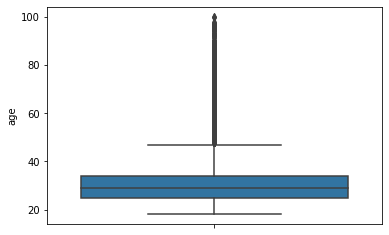

In [112]:
#75% customers are under the age of 38
sn.boxplot(y=df['age'])

<AxesSubplot:ylabel='CustAccountBalance'>

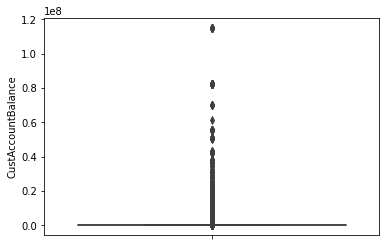

In [113]:
sn.boxplot(y=df['CustAccountBalance'])

<AxesSubplot:ylabel='TransactionAmount (INR)'>

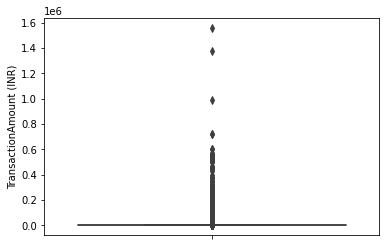

In [114]:
sn.boxplot(y=df['TransactionAmount (INR)'])

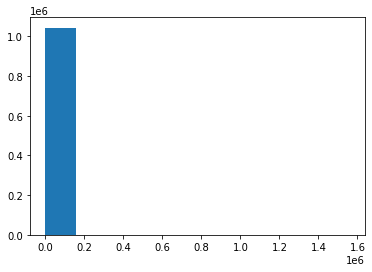

In [115]:
plt.hist(df['TransactionAmount (INR)'])
plt.show()

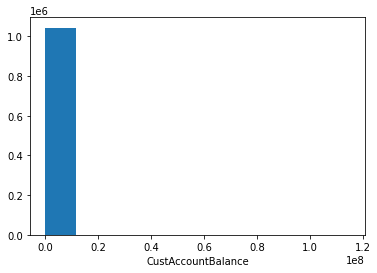

In [121]:
plt.hist(df['CustAccountBalance'])
plt.xlabel('CustAccountBalance')
plt.show()

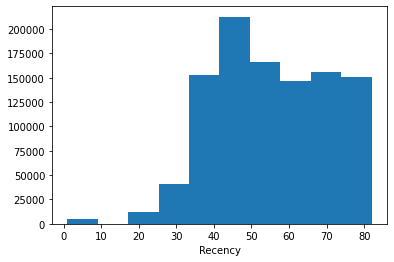

In [118]:
plt.hist(df['Recency'])
plt.xlabel('Recency')
plt.show()

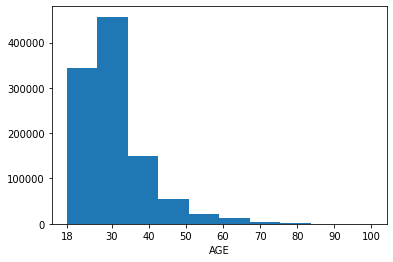

In [119]:
#Maximum people are have age between 18 to 34
plt.hist(df['age'])
plt.xticks([18,30,40,50,60,70,80,90,100])
plt.xlabel('AGE')
plt.show()

<AxesSubplot:xlabel='AM', ylabel='count'>

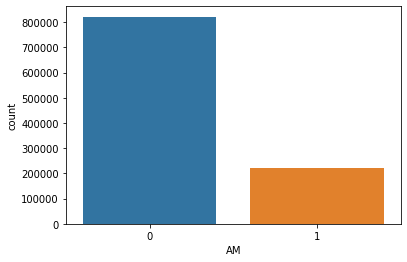

In [644]:
#Most people have done transactions after noon i.e after 11:59 am
sn.countplot(df['AM'])

<AxesSubplot:xlabel='trans_freq', ylabel='count'>

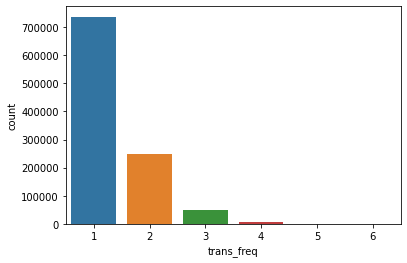

In [752]:
#Most customers have done only one transaction with the bank
sn.countplot(df['trans_freq'])

<AxesSubplot:xlabel='TransactionTime(hr)', ylabel='count'>

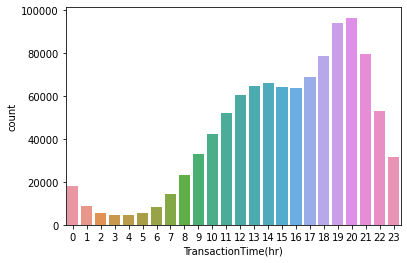

In [645]:
#most transactions are done around 8pm
sn.countplot(df['TransactionTime(hr)'])

<AxesSubplot:xlabel='trans_mnt', ylabel='count'>

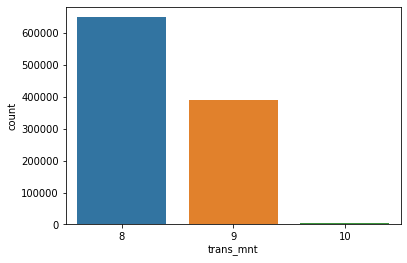

In [646]:
#Maximum no of transcations are done in the month of August and then followed by september but there are hardly any transactions done in october
sn.countplot(df['trans_mnt'])

trans_mnt
8     1560034.99
9      724122.00
10     100000.00
Name: TransactionAmount (INR), dtype: float64


<AxesSubplot:xlabel='trans_mnt'>

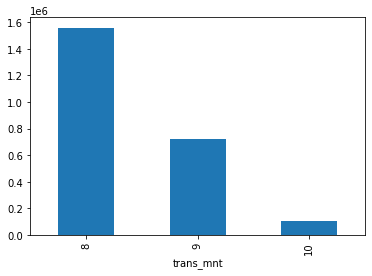

In [657]:
#Maximum value transaction done in august is the highest
print(df.groupby('trans_mnt')['TransactionAmount (INR)'].max())
df.groupby('trans_mnt')['TransactionAmount (INR)'].max().plot(kind='bar')

<AxesSubplot:xlabel='CustGender', ylabel='count'>

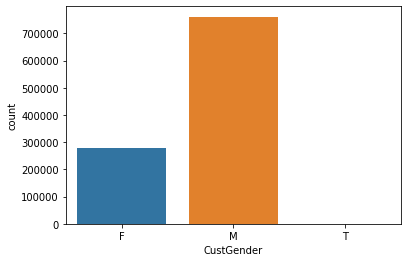

In [653]:
#Most of the transactions are done by Males
sn.countplot(df['CustGender'])

In [ ]:
sn.countplot(df['CustGender'])

<AxesSubplot:xlabel='CustLocation'>

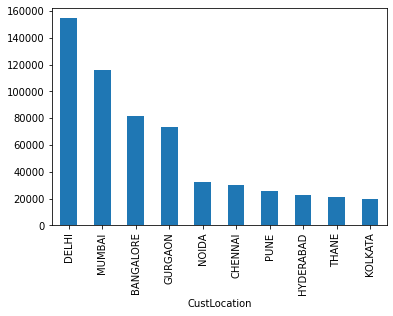

In [668]:
#Maximum Transactions are done from locations Delhi,Mumbai and Banglore
df.groupby('CustLocation')['CustomerID'].count().sort_values(ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:xlabel='CustLocation,CustGender'>

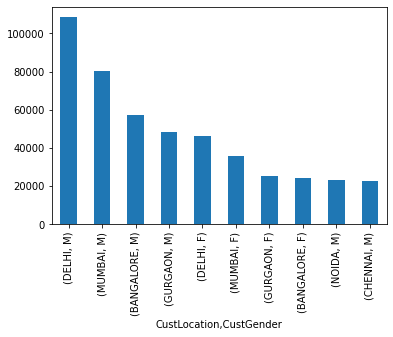

In [102]:
df.groupby('CustLocation')['CustGender'].value_counts().sort_values(ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:xlabel='CustLocation'>

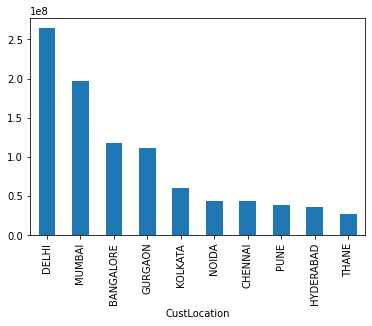

In [53]:
#Total sum of all transactions at different locations
df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:xlabel='CustLocation'>

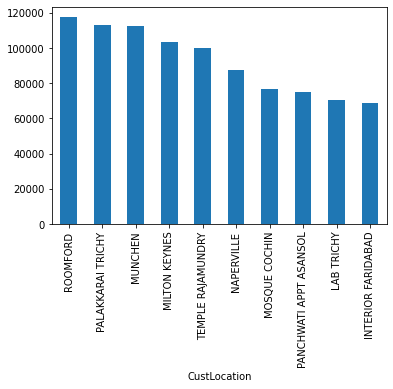

In [712]:
#Avg amount of transactions at different locations
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:xlabel='CustLocation'>

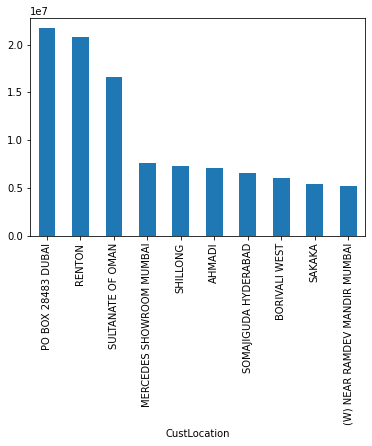

In [80]:
#Avg ban balance of people living at different Locations
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:xlabel='AgeRange', ylabel='count'>

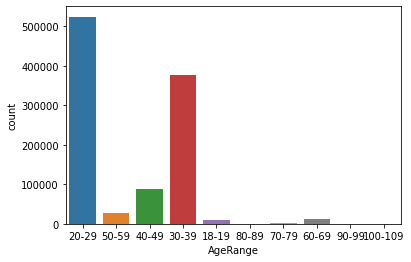

In [63]:
#Most customers are in range 20-39
sn.countplot(df['AgeRange'])

<AxesSubplot:xlabel='AgeRange', ylabel='CustAccountBalance'>

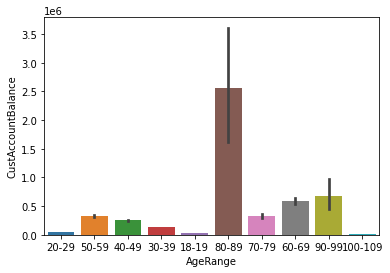

In [61]:
#People Having age between age-range 80-89 are having highest Bank Balance which seems to justify.
#We can see that along with increase in age 
sn.barplot(df['AgeRange'],df['CustAccountBalance'])

<AxesSubplot:xlabel='AgeRange', ylabel='TransactionAmount (INR)'>

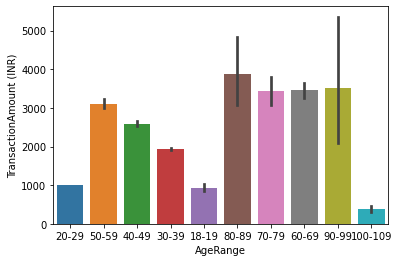

In [124]:
sn.barplot(df['AgeRange'],df['TransactionAmount (INR)'])

<AxesSubplot:xlabel='CustGender', ylabel='CustAccountBalance'>

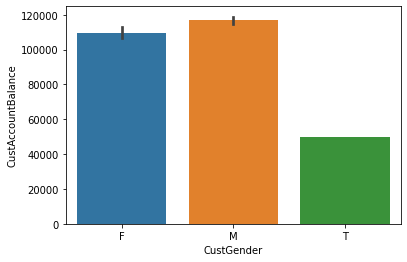

In [65]:
#Avg balace of male customer's is highest
sn.barplot(df['CustGender'],df['CustAccountBalance'])

<AxesSubplot:xlabel='CustGender', ylabel='TransactionAmount (INR)'>

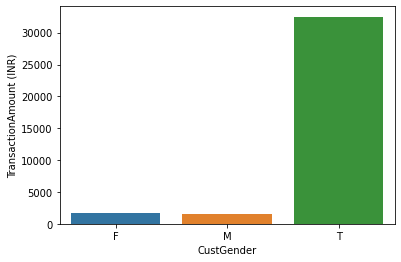

In [66]:
#We see that avg transactions of both male an female are almost same.For T cat we cannot say anything as there is only 1 record of cat T.
sn.barplot(df['CustGender'],df['TransactionAmount (INR)'])

<AxesSubplot:xlabel='trans_mnt'>

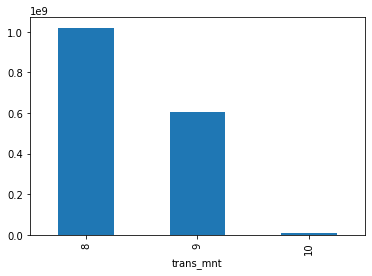

In [81]:
#Total sum of transactions in month of august is highest
df.groupby('trans_mnt')['TransactionAmount (INR)'].sum().plot(kind='bar')

<AxesSubplot:xlabel='trans_mnt'>

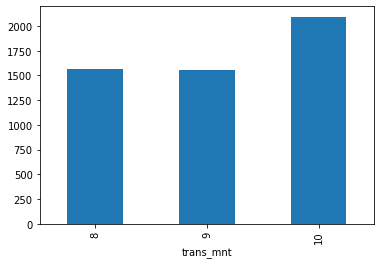

In [672]:
#The average amount of transactions is highest in october and almost equal in august and september
df.groupby('trans_mnt')['TransactionAmount (INR)'].mean().plot(kind='bar')

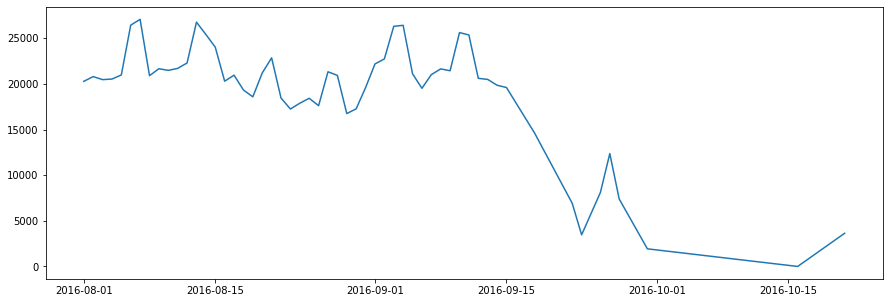

In [690]:
#We can see there is sudden decline in the customer's doing transactions from mid of september
plt.figure(figsize=(15,5))
plt.plot(df.groupby('TransactionDate')['CustomerID'].count())
plt.show()

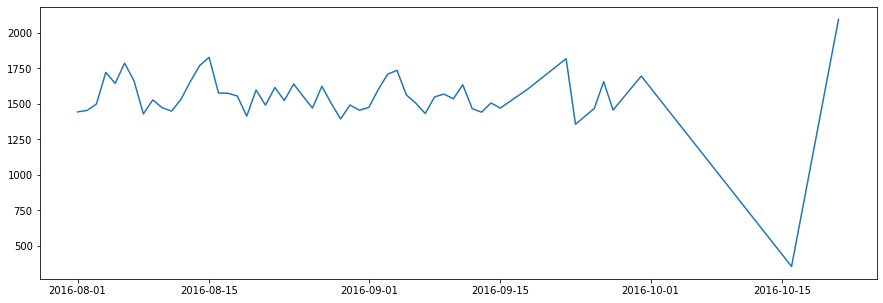

In [705]:
#Till september everyday's average transaction was between 1450 and 1800 but per day avg trans started falling down from 1 oct till 15 oct and then linearly started increasing to max avg transaction.
plt.figure(figsize=(15,5))
plt.plot(df.groupby('TransactionDate')['TransactionAmount (INR)'].mean())
plt.show()

<AxesSubplot:xlabel='CustGender', ylabel='age'>

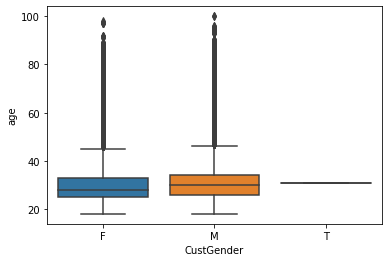

In [715]:
#The distribution of ages in male and female are almost same
sn.boxplot(x=df['CustGender'],y=df['age'])

<AxesSubplot:xlabel='AgeRange', ylabel='count'>

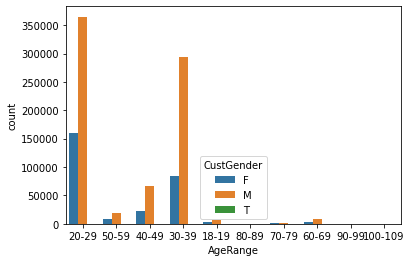

In [125]:
#We can see that male customers are dominating in every age group
#Maximum male customers are in range 20-29 and 30-39
sn.countplot(df['AgeRange'],hue=df['CustGender'])

<AxesSubplot:xlabel='Trans_scale', ylabel='age'>

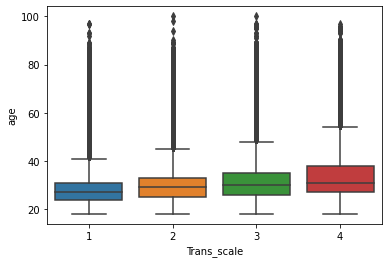

In [111]:
#We can see that as age increase the scale of transaction is increasing
sn.boxplot(y=df['age'],x=df['Trans_scale'])

<AxesSubplot:xlabel='TransactionAmount (INR)', ylabel='CustAccountBalance'>

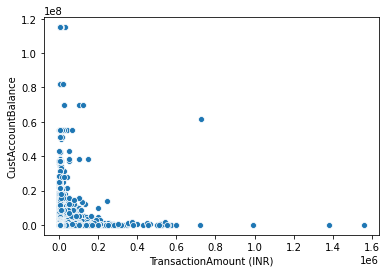

In [135]:
sn.scatterplot(x=df['TransactionAmount (INR)'],y=df['CustAccountBalance'])

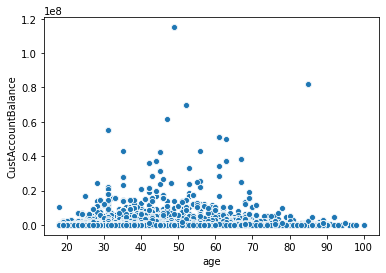

In [312]:
#There are certain people between 30 to 70 who have good amount of balance
sn.scatterplot(x=df['age'],y=df['CustAccountBalance'])
plt.xticks([20,30,40,50,60,70,80,90,100])
plt.show()

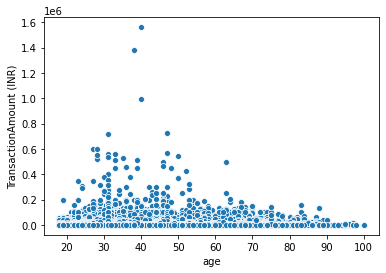

In [313]:
#Between the age of 30 and 55 there are certain people who have done high transactions
sn.scatterplot(x=df['age'],y=df['TransactionAmount (INR)'])
plt.xticks([20,30,40,50,60,70,80,90,100])
plt.show()

In [259]:
df1=df.copy()
#df1.drop_duplicates(subset=['CustomerID'],inplace=True,keep='last')

In [260]:
df1.shape

(1043533, 21)

In [261]:
df1.columns

Index(['CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation',
       'CustAccountBalance', 'TransactionDate', 'TransactionAmount (INR)',
       'trans_mnt', 'TransactionTime(hr)', 'TransactionTime(min)', 'AM', 'age',
       'trans_freq', 'monetary_value', 'Recency', 'FREQUENCY_SCORE',
       'RECENCY_SCORE', 'MONETORY_SCORE', 'AgeRange', 'RFM_SCORE',
       'Trans_Scale'],
      dtype='object')

In [262]:
df1=pd.get_dummies(data=df1,columns=['CustGender'],drop_first=True)

In [263]:
df1.drop(['CustomerID','CustomerDOB','CustLocation','TransactionDate','trans_mnt','TransactionTime(hr)','TransactionTime(min)','AgeRange'],inplace=True,axis=1)

In [241]:
from sklearn.preprocessing import normalize

In [264]:
normalized_data=normalize(df1)
normalized_data =pd.DataFrame(normalized_data,columns=df1.columns)

In [265]:
cluster_errors=[]
cluster_range=range(1,10)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(normalized_data)
    cluster_errors.append(clusters.inertia_)

In [245]:
df1.columns

Index(['CustAccountBalance', 'TransactionAmount (INR)', 'AM', 'age',
       'trans_freq', 'monetary_value', 'Recency', 'FREQUENCY_SCORE',
       'RECENCY_SCORE', 'MONETORY_SCORE', 'RFM_SCORE', 'Trans_Scale',
       'CustGender_M', 'CustGender_T'],
      dtype='object')

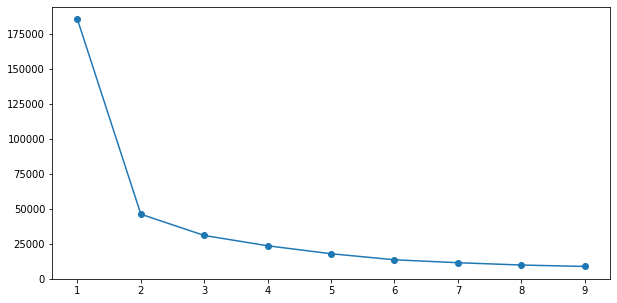

In [266]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range,cluster_errors,marker="o")

In [317]:
clustered=KMeans(3)
clustered.fit(normalized_data)
df1['clusterd']=clustered.labels_

(0.0, 100000.0)

C:\Users\djroc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


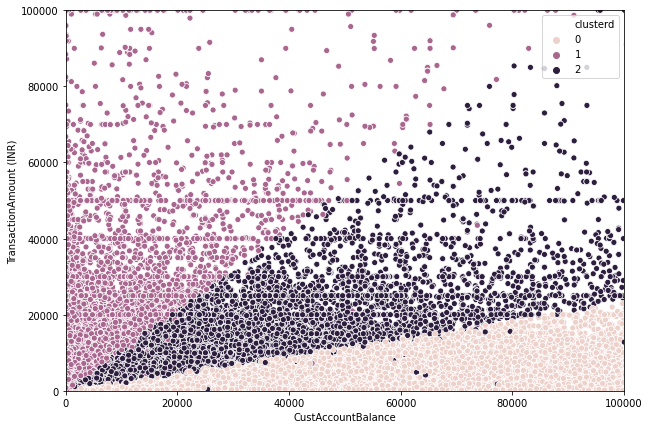

In [318]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['CustAccountBalance'],df1['TransactionAmount (INR)'], hue=df1['clusterd']) 
plt.ylim(0,100000)
plt.xlim(0,100000)

(0.0, 50000.0)

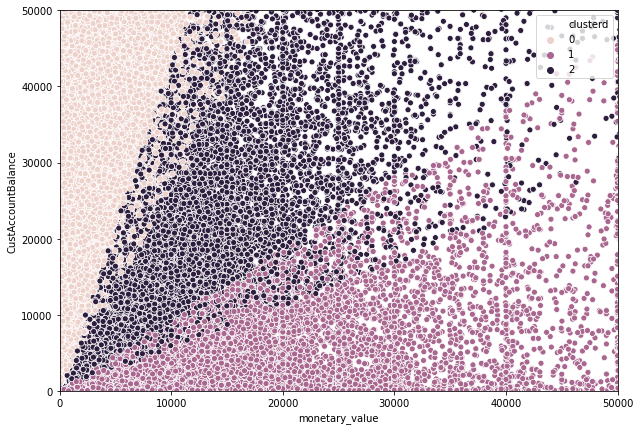

In [319]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['monetary_value'],df1['CustAccountBalance'], hue=df1['clusterd']) 
plt.ylim(0,50000)
plt.xlim(0,50000)

(0.0, 100000.0)

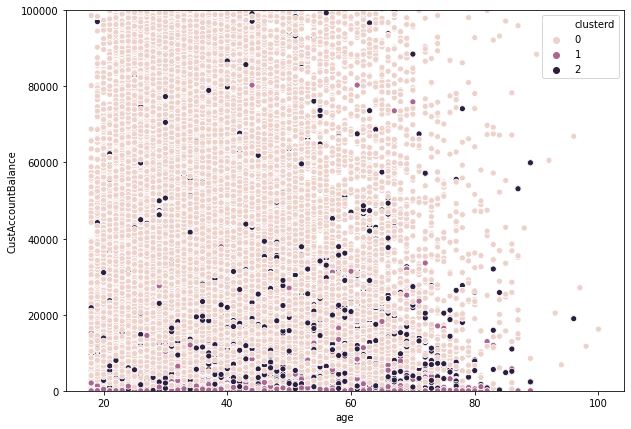

In [279]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['age'],df1['CustAccountBalance'], hue=df1['clusterd']) 
plt.ylim(0,100000)

(0.0, 100000.0)

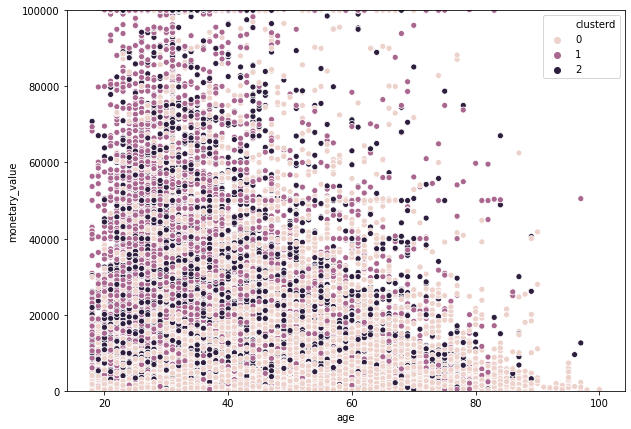

In [307]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['age'],df1['monetary_value'], hue=df1['clusterd']) 
plt.ylim(0,100000)

(0.0, 50000.0)

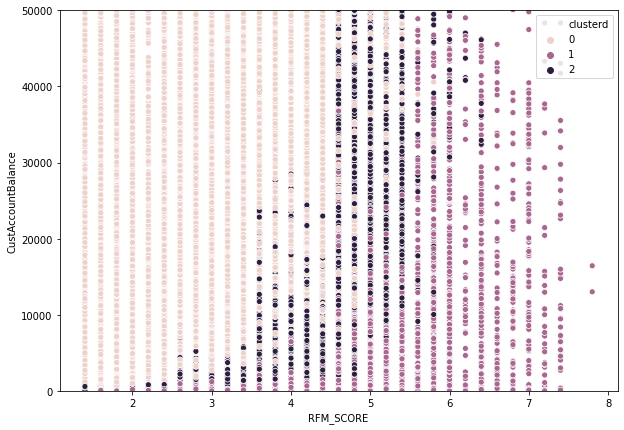

In [282]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['RFM_SCORE'],df1['CustAccountBalance'], hue=df1['clusterd']) 
plt.ylim(0,50000)

(0.0, 50000.0)

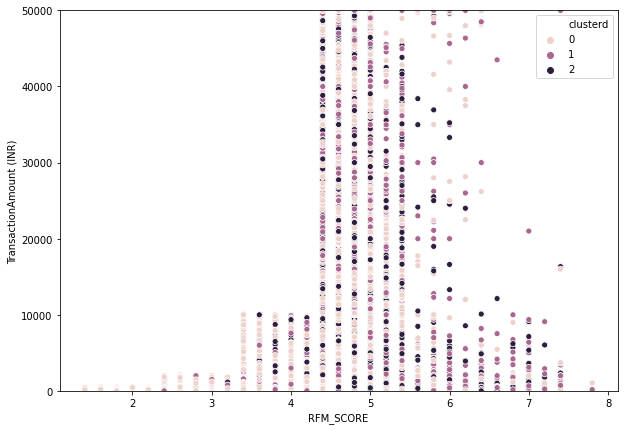

In [283]:
plt.figure(figsize=(10, 7))  
sn.scatterplot(df1['RFM_SCORE'],df1['TransactionAmount (INR)'], hue=df1['clusterd']) 
plt.ylim(0,50000)

In [320]:
grouped_data = df1.groupby(['clusterd']).mean().round(1)
grouped_data

,CustAccountBalance,TransactionAmount (INR),AM,age,trans_freq,monetary_value,Recency,FREQUENCY_SCORE,RECENCY_SCORE,MONETORY_SCORE,RFM_SCORE,Trans_Scale,CustGender_M,CustGender_T
clusterd,,,,,,,,,,,,,,
0,145065.9,1126.2,0.2,31.3,1.3,1435.4,55.1,1.0,2.5,1.7,2.5,1.6,0.7,0.0
1,1197.8,2931.4,0.2,29.6,1.5,4572.3,55.1,1.1,2.5,2.1,2.9,1.8,0.8,0.0
2,9629.7,3442.4,0.2,30.5,1.5,4702.2,54.2,1.1,2.6,2.4,3.1,2.0,0.7,0.0


In [ ]:
#cluster 0-Customers with very high bank balance,small avg transactions ,young ,low monetary value and with low RFM score
#cluster 1-Customers with low bank balance,moderate avg transactions,young,high monetary value and with moderate RFM score
#cluster 2-Customers with moderate bank balance,high avg transactions,young,high monetary value and high moderate RFM score